# Teste de Kolmogorov-Smirnov

O Teste de Kolmogorov-Smirnov (KS) é um método estatístico utilizado para determinar se uma amostra segue uma distribuição de probabilidade específica. Ele compara a função de distribuição empírica (EDF) dos dados observados com a função de distribuição acumulada (CDF) da distribuição teórica. Este teste é útil para avaliar a adequação de um modelo teórico aos dados observados.


O teste KS calcula a estatística D de Kolmogorov-Smirnov, que é a maior diferença absoluta entre as funções de distribuição empírica e teórica. Comparamos essa estatística com um valor crítico para determinar se os dados observados seguem a distribuição teórica.

## Resultados Esperados
<br>

<div style="border:2px solid black; padding: 10px; background-color:#CEE0DC">
    <ul>
        <li>Se a estatística D for menor que o valor crítico, podemos aceitar a hipótese nula de que os dados seguem a distribuição teórica.</li>
        <li>Se a estatística D for maior que o valor crítico, há evidências de que os dados observados não seguem a distribuição teórica.</li>
    </ul>  </div>


In [2]:
z_values_dict = {
    (0.0, 0.0): 0.5000, (0.0, 0.01): 0.4960, (0.0, 0.02): 0.4920, (0.0, 0.03): 0.4880, (0.0, 0.04): 0.4840, (0.0, 0.05): 0.4801,
    (0.0, 0.06): 0.4761, (0.0, 0.07): 0.4721, (0.0, 0.08): 0.4681, (0.0, 0.09): 0.4641, (-0.1, 0.0): 0.4602, (-0.1, 0.01): 0.4562,
    (-0.1, 0.02): 0.4522, (-0.1, 0.03): 0.4483, (-0.1, 0.04): 0.4443, (-0.1, 0.05): 0.4404, (-0.1, 0.06): 0.4364, (-0.1, 0.07): 0.4325,
    (-0.1, 0.08): 0.4286, (-0.1, 0.09): 0.4247, (-0.2, 0.0): 0.4207, (-0.2, 0.01): 0.4168, (-0.2, 0.02): 0.4129, (-0.2, 0.03): 0.4090,
    (-0.2, 0.04): 0.4052, (-0.2, 0.05): 0.4013, (-0.2, 0.06): 0.3974, (-0.2, 0.07): 0.3936, (-0.2, 0.08): 0.3897, (-0.2, 0.09): 0.3859,
    (-0.3, 0.0): 0.3821, (-0.3, 0.01): 0.3783, (-0.3, 0.02): 0.3745, (-0.3, 0.03): 0.3707, (-0.3, 0.04): 0.3669, (-0.3, 0.05): 0.3632,
    (-0.3, 0.06): 0.3594, (-0.3, 0.07): 0.3557, (-0.3, 0.08): 0.3520, (-0.3, 0.09): 0.3483, (-0.4, 0.0): 0.3446, (-0.4, 0.01): 0.3409,
    (-0.4, 0.02): 0.3372, (-0.4, 0.03): 0.3336, (-0.4, 0.04): 0.3300, (-0.4, 0.05): 0.3264, (-0.4, 0.06): 0.3228, (-0.4, 0.07): 0.3192,
    (-0.4, 0.08): 0.3156, (-0.4, 0.09): 0.3121, (-0.5, 0.0): 0.3085, (-0.5, 0.01): 0.3050, (-0.5, 0.02): 0.3015, (-0.5, 0.03): 0.2981,
    (-0.5, 0.04): 0.2946, (-0.5, 0.05): 0.2912, (-0.5, 0.06): 0.2877, (-0.5, 0.07): 0.2843, (-0.5, 0.08): 0.2810, (-0.5, 0.09): 0.2776,
    (-0.6, 0.0): 0.2743, (-0.6, 0.01): 0.2709, (-0.6, 0.02): 0.2676, (-0.6, 0.03): 0.2643, (-0.6, 0.04): 0.2611, (-0.6, 0.05): 0.2578,
    (-0.6, 0.06): 0.2546, (-0.6, 0.07): 0.2514, (-0.6, 0.08): 0.2483, (-0.6, 0.09): 0.2451, (-0.7, 0.0): 0.2420, (-0.7, 0.01): 0.2389,
    (-0.7, 0.02): 0.2358, (-0.7, 0.03): 0.2327, (-0.7, 0.04): 0.2296, (-0.7, 0.05): 0.2266, (-0.7, 0.06): 0.2236, (-0.7, 0.07): 0.2206,
    (-0.7, 0.08): 0.2177, (-0.7, 0.09): 0.2148, (-0.8, 0.0): 0.2119, (-0.8, 0.01): 0.2090, (-0.8, 0.02): 0.2061, (-0.8, 0.03): 0.2033,
    (-0.8, 0.04): 0.2005, (-0.8, 0.05): 0.1977, (-0.8, 0.06): 0.1949, (-0.8, 0.07): 0.1922, (-0.8, 0.08): 0.1894, (-0.8, 0.09): 0.1867,
    (-0.9, 0.0): 0.1841, (-0.9, 0.01): 0.1814, (-0.9, 0.02): 0.1788, (-0.9, 0.03): 0.1762, (-0.9, 0.04): 0.1736, (-0.9, 0.05): 0.1711,
    (-0.9, 0.06): 0.1685, (-0.9, 0.07): 0.1660, (-0.9, 0.08): 0.1635, (-0.9, 0.09): 0.1611, (-1.0, 0.0): 0.1587, (-1.0, 0.01): 0.1562,
    (-1.0, 0.02): 0.1539, (-1.0, 0.03): 0.1515, (-1.0, 0.04): 0.1492, (-1.0, 0.05): 0.1469, (-1.0, 0.06): 0.1446, (-1.0, 0.07): 0.1423,
    (-1.0, 0.08): 0.1401, (-1.0, 0.09): 0.1379, (-1.1, 0.0): 0.1357, (-1.1, 0.01): 0.1335, (-1.1, 0.02): 0.1314, (-1.1, 0.03): 0.1292,
    (-1.1, 0.04): 0.1271, (-1.1, 0.05): 0.1251, (-1.1, 0.06): 0.1230, (-1.1, 0.07): 0.1210, (-1.1, 0.08): 0.1190, (-1.1, 0.09): 0.1170,
    (-1.2, 0.0): 0.1151, (-1.2, 0.01): 0.1131, (-1.2, 0.02): 0.1112, (-1.2, 0.03): 0.1093, (-1.2, 0.04): 0.1075, (-1.2, 0.05): 0.1056,
    (-1.2, 0.06): 0.1038, (-1.2, 0.07): 0.1020, (-1.2, 0.08): 0.1003, (-1.2, 0.09): 0.0985, (-1.3, 0.0): 0.0968, (-1.3, 0.01): 0.0951,
    (-1.3, 0.02): 0.0934, (-1.3, 0.03): 0.0918, (-1.3, 0.04): 0.0901, (-1.3, 0.05): 0.0885, (-1.3, 0.06): 0.0869, (-1.3, 0.07): 0.0853,
    (-1.3, 0.08): 0.0838, (-1.3, 0.09): 0.0823, (-1.4, 0.0): 0.0808, (-1.4, 0.01): 0.0793, (-1.4, 0.02): 0.0778, (-1.4, 0.03): 0.0764,
    (-1.4, 0.04): 0.0749, (-1.4, 0.05): 0.0735, (-1.4, 0.06): 0.0721, (-1.4, 0.07): 0.0708, (-1.4, 0.08): 0.0694, (-1.4, 0.09): 0.0681,
    (-1.5, 0.0): 0.0668, (-1.5, 0.01): 0.0655, (-1.5, 0.02): 0.0643, (-1.5, 0.03): 0.0630, (-1.5, 0.04): 0.0618, (-1.5, 0.05): 0.0606,
    (-1.5, 0.06): 0.0594, (-1.5, 0.07): 0.0582, (-1.5, 0.08): 0.0571, (-1.5, 0.09): 0.0559, (-1.6, 0.0): 0.0548, (-1.6, 0.01): 0.0537,
    (-1.6, 0.02): 0.0526, (-1.6, 0.03): 0.0516, (-1.6, 0.04): 0.0505, (-1.6, 0.05): 0.0495, (-1.6, 0.06): 0.0485, (-1.6, 0.07): 0.0475,
    (-1.6, 0.08): 0.0465, (-1.6, 0.09): 0.0455, (-1.7, 0.0): 0.0446, (-1.7, 0.01): 0.0436, (-1.7, 0.02): 0.0427, (-1.7, 0.03): 0.0418,
    (-1.7, 0.04): 0.0409, (-1.7, 0.05): 0.0401, (-1.7, 0.06): 0.0392, (-1.7, 0.07): 0.0384, (-1.7, 0.08): 0.0375, (-1.7, 0.09): 0.0367,
    (-1.8, 0.0): 0.0359, (-1.8, 0.01): 0.0351, (-1.8, 0.02): 0.0344, (-1.8, 0.03): 0.0336, (-1.8, 0.04): 0.0329, (-1.8, 0.05): 0.0322,
    (-1.8, 0.06): 0.0314, (-1.8, 0.07): 0.0307, (-1.8, 0.08): 0.0301, (-1.8, 0.09): 0.0294, (-1.9, 0.0): 0.0287, (-1.9, 0.01): 0.0281,
    (-1.9, 0.02): 0.0274, (-1.9, 0.03): 0.0268, (-1.9, 0.04): 0.0262, (-1.9, 0.05): 0.0256, (-1.9, 0.06): 0.0250, (-1.9, 0.07): 0.0244,
    (-1.9, 0.08): 0.0239, (-1.9, 0.09): 0.0233, (-2.0, 0.0): 0.0228, (-2.0, 0.01): 0.0222, (-2.0, 0.02): 0.0217, (-2.0, 0.03): 0.0212,
    (-2.0, 0.04): 0.0207, (-2.0, 0.05): 0.0202, (-2.0, 0.06): 0.0197, (-2.0, 0.07): 0.0192, (-2.0, 0.08): 0.0188, (-2.0, 0.09): 0.0183,
    (-2.1, 0.0): 0.0179, (-2.1, 0.01): 0.0174, (-2.1, 0.02): 0.0170, (-2.1, 0.03): 0.0166, (-2.1, 0.04): 0.0162, (-2.1, 0.05): 0.0158,
    (-2.1, 0.06): 0.0154, (-2.1, 0.07): 0.0150, (-2.1, 0.08): 0.0146, (-2.1, 0.09): 0.0143, (-2.2, 0.0): 0.0139, (-2.2, 0.01): 0.0136,
    (-2.2, 0.02): 0.0132, (-2.2, 0.03): 0.0129, (-2.2, 0.04): 0.0125, (-2.2, 0.05): 0.0122, (-2.2, 0.06): 0.0119, (-2.2, 0.07): 0.0116,
    (-2.2, 0.08): 0.0113, (-2.2, 0.09): 0.0110, (-2.3, 0.0): 0.0107, (-2.3, 0.01): 0.0104, (-2.3, 0.02): 0.0102, (-2.3, 0.03): 0.0099,
    (-2.3, 0.04): 0.0096, (-2.3, 0.05): 0.0094, (-2.3, 0.06): 0.0091, (-2.3, 0.07): 0.0089, (-2.3, 0.08): 0.0087, (-2.3, 0.09): 0.0084,
    (-2.4, 0.0): 0.0082, (-2.4, 0.01): 0.0080, (-2.4, 0.02): 0.0078, (-2.4, 0.03): 0.0075, (-2.4, 0.04): 0.0073, (-2.4, 0.05): 0.0071,
    (-2.4, 0.06): 0.0069, (-2.4, 0.07): 0.0068, (-2.4, 0.08): 0.0066, (-2.4, 0.09): 0.0064, (-2.5, 0.0): 0.0062, (-2.5, 0.01): 0.0060,
    (-2.5, 0.02): 0.0059, (-2.5, 0.03): 0.0057, (-2.5, 0.04): 0.0055, (-2.5, 0.05): 0.0054, (-2.5, 0.06): 0.0052, (-2.5, 0.07): 0.0051,
    (-2.5, 0.08): 0.0049, (-2.5, 0.09): 0.0048, (-2.6, 0.0): 0.0047, (-2.6, 0.01): 0.0045, (-2.6, 0.02): 0.0044, (-2.6, 0.03): 0.0043,
    (-2.6, 0.04): 0.0041, (-2.6, 0.05): 0.0040, (-2.6, 0.06): 0.0039, (-2.6, 0.07): 0.0038, (-2.6, 0.08): 0.0037, (-2.6, 0.09): 0.0036,
    (-2.7, 0.0): 0.0035, (-2.7, 0.01): 0.0034, (-2.7, 0.02): 0.0033, (-2.7, 0.03): 0.0032, (-2.7, 0.04): 0.0031, (-2.7, 0.05): 0.0030,
    (-2.7, 0.06): 0.0029, (-2.7, 0.07): 0.0028, (-2.7, 0.08): 0.0027, (-2.7, 0.09): 0.0026, (-2.8, 0.0): 0.0026, (-2.8, 0.01): 0.0025,
    (-2.8, 0.02): 0.0024, (-2.8, 0.03): 0.0023, (-2.8, 0.04): 0.0023, (-2.8, 0.05): 0.0022, (-2.8, 0.06): 0.0021, (-2.8, 0.07): 0.0021,
    (-2.8, 0.08): 0.0020, (-2.8, 0.09): 0.0019, (-2.9, 0.0): 0.0019, (-2.9, 0.01): 0.0018, (-2.9, 0.02): 0.0018, (-2.9, 0.03): 0.0017,
    (-2.9, 0.04): 0.0016, (-2.9, 0.05): 0.0016, (-2.9, 0.06): 0.0015, (-2.9, 0.07): 0.0015, (-2.9, 0.08): 0.0014, (-2.9, 0.09): 0.0014,
    (-3.0, 0.0): 0.0013, (-3.0, 0.01): 0.0013, (-3.0, 0.02): 0.0013, (-3.0, 0.03): 0.0012, (-3.0, 0.04): 0.0012, (-3.0, 0.05): 0.0011,
    (-3.0, 0.06): 0.0011, (-3.0, 0.07): 0.0011, (-3.0, 0.08): 0.0010, (-3.0, 0.09): 0.0010, (-3.1, 0.0): 0.0010, (-3.1, 0.01): 0.0009,
    (-3.1, 0.02): 0.0009, (-3.1, 0.03): 0.0009, (-3.1, 0.04): 0.0008, (-3.1, 0.05): 0.0008, (-3.1, 0.06): 0.0008, (-3.1, 0.07): 0.0008,
    (-3.1, 0.08): 0.0007, (-3.1, 0.09): 0.0007, (-3.2, 0.0): 0.0007, (-3.2, 0.01): 0.0007, (-3.2, 0.02): 0.0006, (-3.2, 0.03): 0.0006,
    (-3.2, 0.04): 0.0006, (-3.2, 0.05): 0.0006, (-3.2, 0.06): 0.0006, (-3.2, 0.07): 0.0005, (-3.2, 0.08): 0.0005, (-3.2, 0.09): 0.0005,
    (-3.3, 0.0): 0.0005, (-3.3, 0.01): 0.0005, (-3.3, 0.02): 0.0005, (-3.3, 0.03): 0.0004, (-3.3, 0.04): 0.0004, (-3.3, 0.05): 0.0004,
    (-3.3, 0.06): 0.0004, (-3.3, 0.07): 0.0004, (-3.3, 0.08): 0.0004, (-3.3, 0.09): 0.0003, (-3.4, 0.0): 0.0003, (-3.4, 0.01): 0.0003,
    (-3.4, 0.02): 0.0003, (-3.4, 0.03): 0.0003, (-3.4, 0.04): 0.0003, (-3.4, 0.05): 0.0003, (-3.4, 0.06): 0.0003, (-3.4, 0.07): 0.0003,
    (-3.4, 0.08): 0.0003, (-3.4, 0.09): 0.0002, (-3.5, 0.0): 0.0002, (-3.5, 0.01): 0.0002, (-3.5, 0.02): 0.0002, (-3.5, 0.03): 0.0002,
    (-3.5, 0.04): 0.0002, (-3.5, 0.05): 0.0002, (-3.5, 0.06): 0.0002, (-3.5, 0.07): 0.0002, (-3.5, 0.08): 0.0002, (-3.5, 0.09): 0.0002,
    (-3.6, 0.0): 0.0002, (-3.6, 0.01): 0.0002, (-3.6, 0.02): 0.0001, (-3.6, 0.03): 0.0001, (-3.6, 0.04): 0.0001, (-3.6, 0.05): 0.0001,
    (-3.6, 0.06): 0.0001, (-3.6, 0.07): 0.0001, (-3.6, 0.08): 0.0001, (-3.6, 0.09): 0.0001, (-3.7, 0.0): 0.0001, (-3.7, 0.01): 0.0001,
    (-3.7, 0.02): 0.0001, (-3.7, 0.03): 0.0001, (-3.7, 0.04): 0.0001, (-3.7, 0.05): 0.0001, (-3.7, 0.06): 0.0001, (-3.7, 0.07): 0.0001,
    (-3.7, 0.08): 0.0001, (-3.7, 0.09): 0.0001, (-3.8, 0.0): 0.0001, (-3.8, 0.01): 0.0001, (-3.8, 0.02): 0.0001, (-3.8, 0.03): 0.0001,
    (-3.8, 0.04): 0.0001, (-3.8, 0.05): 0.0001, (-3.8, 0.06): 0.0001, (-3.8, 0.07): 0.0001, (-3.8, 0.08): 0.0001, (-3.8, 0.09): 0.0001,
    (-3.9, 0.0): 0.0000, (-3.9, 0.01): 0.0000, (-3.9, 0.02): 0.0000, (-3.9, 0.03): 0.0000, (-3.9, 0.04): 0.0000, (-3.9, 0.05): 0.0000,
    (-3.9, 0.06): 0.0000, (-3.9, 0.07): 0.0000, (-3.9, 0.08): 0.0000, (-3.9, 0.09): 0.0000}

nivel_significancia_0_05 = {
    1: 0.9750,
    2: 0.8419,
    3: 0.7076,
    4: 0.6239,
    5: 0.5633,
    6: 0.5193,
    7: 0.4834,
    8: 0.4543,
    9: 0.4300,
    10: 0.4092,
    11: 0.3912,
    12: 0.3754,
    13: 0.3614,
    14: 0.3489,
    15: 0.3376,
    16: 0.3273,
    17: 0.3180,
    18: 0.3094,
    19: 0.3014,
    20: 0.2941,
    21: 0.2872,
    22: 0.2809,
    23: 0.2749,
    24: 0.2693,
    25: 0.2640,
    26: 0.2591,
    27: 0.2544,
    28: 0.2499,
    29: 0.2457,
    30: 0.2417,
    31: 0.2379,
    32: 0.2342,
    33: 0.2308,
    34: 0.2274,
    35: 0.2242,
    36: 0.23,
    37: 0.2183,
    38: 0.2154,
    39: 0.2127,
    40: 0.2101,
    41: 0.2076,
    42: 0.2052,
    43: 0.2028,
    44: 0.2006,
    45: 0.1984,
    46: 0.1963,
    47: 0.1942,
    48: 0.1922,
    49: 0.1903,
    50: 0.1884,
    51: 0.1866,
    52: 0.1848,
    53: 0.1831,
    54: 0.1814,
    55: 0.1798,
    56: 0.1782,
    57: 0.1767,
    58: 0.1752,
    59: 0.1737,
    60: 0.1723,
    61: 0.1709,
    62: 0.1696,
    63: 0.1682,
    64: 0.1669,
    65: 0.1657,
    66: 0.1644,
    67: 0.1632,
    68: 0.1620,
    69: 0.1609,
    70: 0.1597,
    71: 0.1586,
    72: 0.1576,
    73: 0.1565,
    74: 0.1554,
    75: 0.1544,
    76: 0.1534,
    77: 0.1524,
    78: 0.1515,
    79: 0.1505,
    80: 0.1496,
    81: 0.1487,
    82: 0.1478,
    83: 0.1469,
    84: 0.1460,
    85: 0.1452,
    86: 0.1444,
    87: 0.1435,
    88: 0.1427,
    89: 0.1419,
    90: 0.1412,
    91: 0.1404,
    92: 0.1396,
    93: 0.1389,
    94: 0.1382,
    95: 0.1375,
    96: 0.1368,
    97: 0.1361,
    98: 0.1354,
    99: 0.1347,
    100: 0.1340
}

Média (μ): 42.638889
Desvio padrão (σ): 7.099911
-------------------------------------------------------------------------------------
Os dados observados seguem uma distribuição normal.
-------------------------------------------------------------------------------------
Estatística D: 0.1187
Valor crítico: 0.23
p-value: 0.9977770056514408
-------------------------------------------------------------------------------------


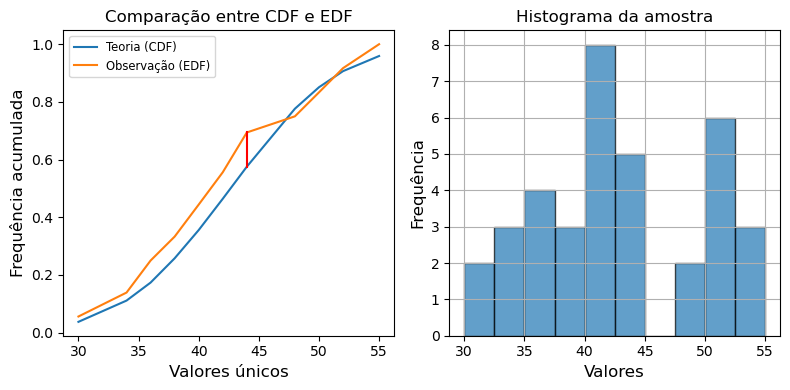

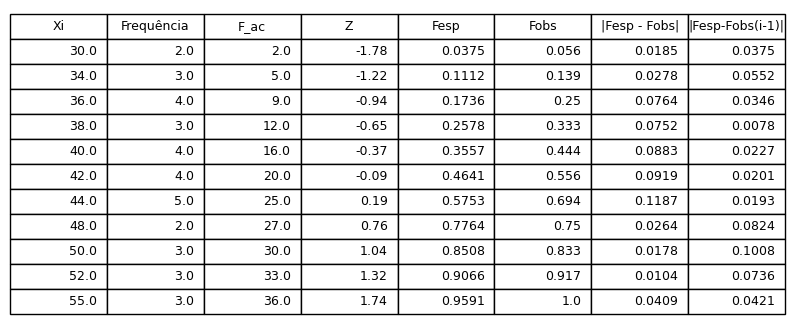

In [95]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from collections import Counter



def calcular_F_exp(z_values, z_values_dict):
    F_exp = {}
    for z in z_values:
        parte_inteira = int(z)
        parte_decimal = round(z - parte_inteira, 2)
        if (parte_inteira, parte_decimal) in z_values_dict:
            F_exp[z] = z_values_dict[(parte_inteira, parte_decimal)]
    return F_exp

def kolmogorov_smirnov_test(sample):
    sample =np.sort(sample)
    # Contagem de frequências
    count = Counter(sample)
    
    # Criar uma lista de valores únicos e suas frequências
    unique_values = list(count.keys())
    freq_values = list(count.values())
    
    # Definir média e desvio padrão
    mu = sum(sample) / len(sample)
    print("Média (μ):", "{:.6f}".format(mu))
    sigma = np.sqrt(np.sum((sample - mu)**2)/(len(sample)-1))
    print("Desvio padrão (σ):", "{:.6f}".format(sigma))
    
    
    # Calcular os valores Z para cada valor na amostra
    Z_values = np.round(((unique_values - mu) / sigma),2)

    
    # Calcular as frequências acumuladas esperadas usando os valores Z
    F_exp = np.round((st.norm.cdf(Z_values)),4)
   
    # Estatísticas do teste
    n = len(unique_values)
    F_obs = np.round((np.cumsum(freq_values) / len(sample)),3)
    diff = np.abs(F_exp - F_obs)
    F_obsx_i = np.insert(F_obs, 0, 0)[:-1]
    diff2 = np.abs(F_exp - F_obsx_i)
    D = np.round((np.max(np.maximum(diff, diff2))), 8)

    
    
    D_critical = nivel_significancia_0_05[(len(sample))]
    p_value = st.kstwobign.sf(D * np.sqrt(n))
    
    # Exibir resultados do teste
    print("-" * 85)
    if D<D_critical:
        print("Os dados observados seguem uma distribuição normal.")
    else:
        print("Há evidências de que os dados observados não seguem uma distribuição normal.")
    print("-" * 85)
    print("Estatística D:", D)
    print("Valor crítico:", D_critical)
    print("p-value:", p_value)
    print("-" * 85)
    
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    
     # Gráfico comparativo
    axs[0].plot(unique_values, F_exp, label='Teoria (CDF)', linestyle='-')
    axs[0].plot(unique_values, F_obs, label='Observação (EDF)', linestyle='-')
    max_diff_index = np.argmax(diff)
    axs[0].plot([unique_values[max_diff_index], unique_values[max_diff_index]],
                [F_exp[max_diff_index], F_obs[max_diff_index]],
                color='red', linestyle='-')
    axs[0].legend(fontsize='small')
    axs[0].set_title('Comparação entre CDF e EDF')
    axs[0].set_xlabel('Valores únicos', size=12)
    axs[0].set_ylabel('Frequência acumulada', size=12)
    axs[0].tick_params(axis='both', which='major', labelsize=10)
    
    # Histograma
    axs[1].hist(sample, bins=10, edgecolor='black', alpha=0.7)
    axs[1].set_title('Histograma da amostra', size=12)
    axs[1].set_xlabel('Valores', size=12)
    axs[1].set_ylabel('Frequência', size=12)
    axs[1].tick_params(axis='both', which='major')
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Exibir a tabela
    freq_acumulada = np.cumsum(freq_values)
    col_labels = ['Xi','Frequência', 'F_ac', 'Z', 'Fesp', 'Fobs', '|Fesp - Fobs|', '|Fesp-Fobs(i-1)|']
    table_data = np.column_stack((unique_values,freq_values,freq_acumulada, Z_values, F_exp, F_obs, diff, diff2))
    fig, ax = plt.subplots(figsize=(10, 4))
    table = ax.table(cellText=np.around(table_data, decimals=6), colLabels=col_labels, loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)
    ax.axis('off')
    plt.show()
    
    resultados_teste = {
        'Média': mu,
        'Tamanho da amostra': len(sample),
        'D_calc': D,
        'D_critico': D_critical,
        'Normal?': "Normal" if D < D_critical else "Não"
    }
    return resultados_teste

resultados=[]

dados = np.sort([52, 50, 36, 40, 30, 42, 38, 38, 52, 44, 36, 34,50, 42, 34, 55, 36, 55, 42, 52, 34, 48, 55, 44,44, 30, 48, 40, 40, 44, 40, 44, 38, 36, 50, 42])
resultados.append(kolmogorov_smirnov_test(dados))


Média (μ): 0.216880
Desvio padrão (σ): 0.980156
-------------------------------------------------------------------------------------
Os dados observados seguem uma distribuição normal.
-------------------------------------------------------------------------------------
Estatística D: 0.0857
Valor crítico: 0.2101
p-value: 0.9306096342459254
-------------------------------------------------------------------------------------


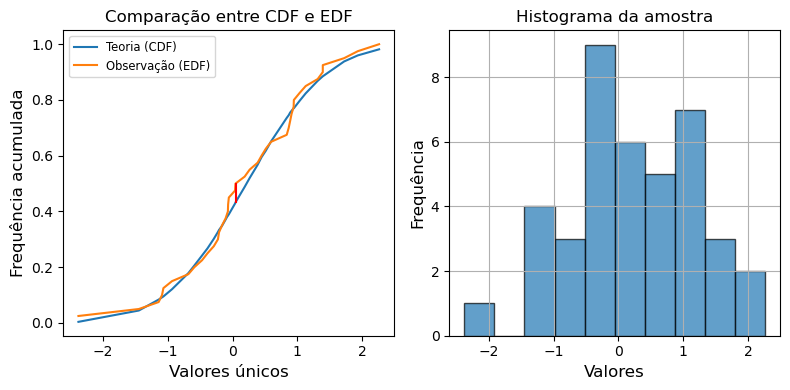

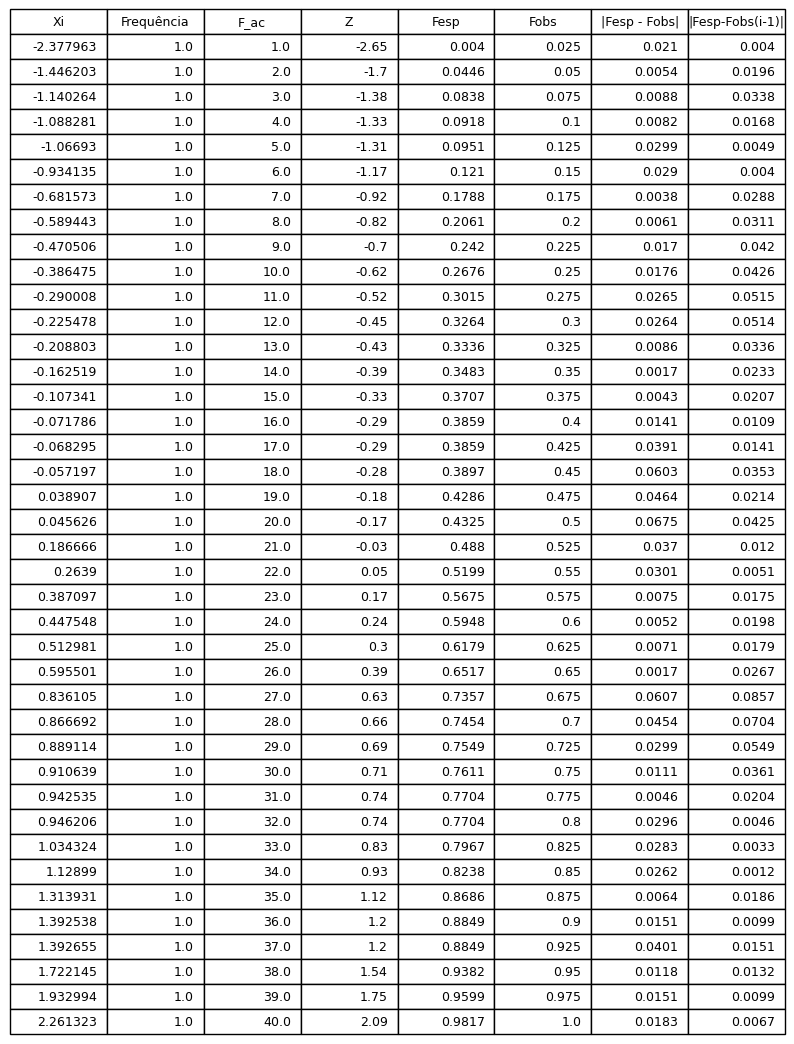

In [20]:
dados = np.random.normal(size=40)
resultados.append(kolmogorov_smirnov_test(dados))

Média (μ): 0.123302
Desvio padrão (σ): 0.917802
-------------------------------------------------------------------------------------
Os dados observados seguem uma distribuição normal.
-------------------------------------------------------------------------------------
Estatística D: 0.0838
Valor crítico: 0.1884
p-value: 0.8739839287522091
-------------------------------------------------------------------------------------


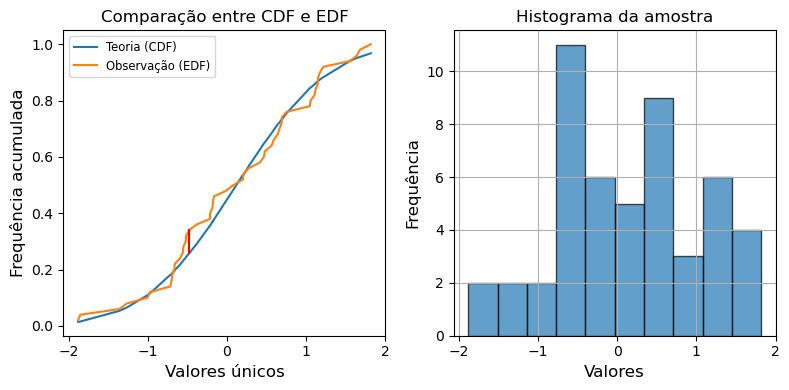

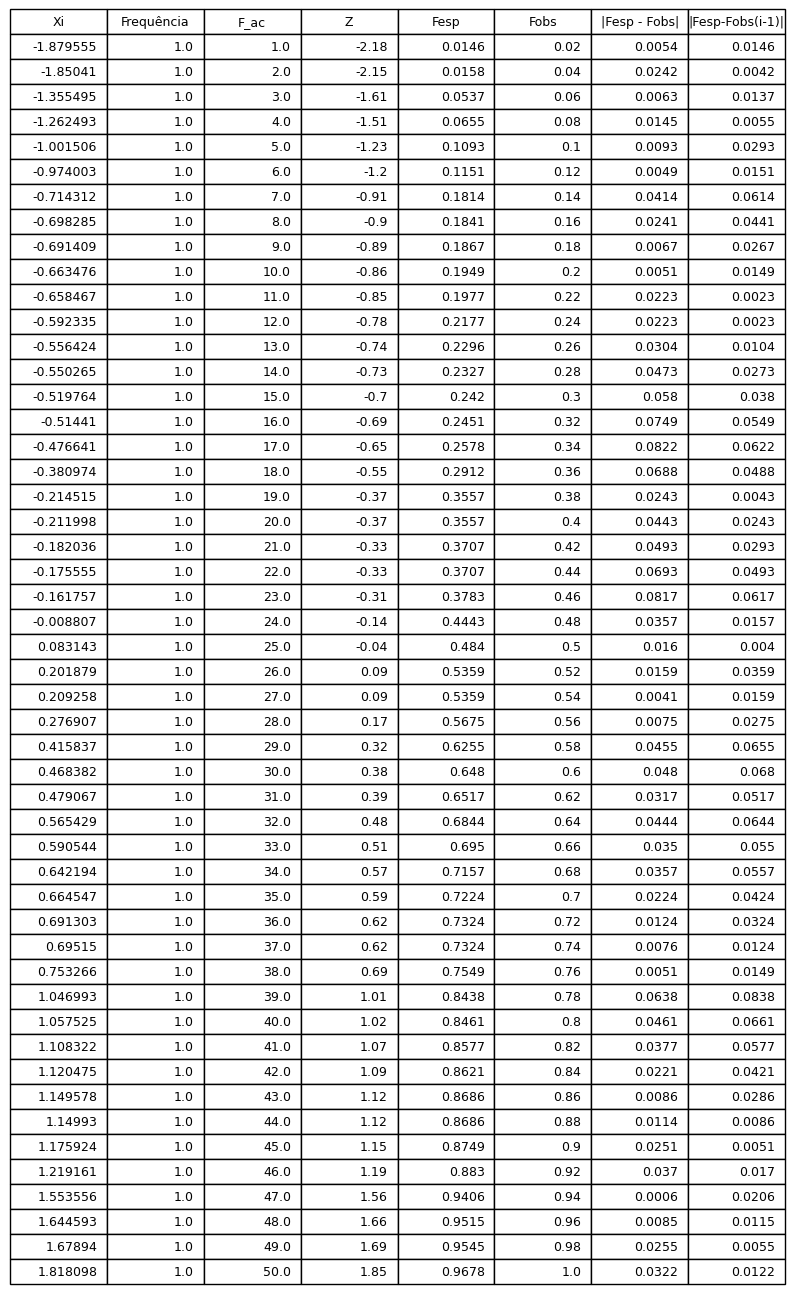

In [21]:
dados = np.sort(np.random.normal(size=50))
resultados.append(kolmogorov_smirnov_test(dados))

# Teste Kolmogorov-Smirnov com Distribuição Não Normal



Média (μ): 29.767286
Desvio padrão (σ): 41.512367
-------------------------------------------------------------------------------------
Há evidências de que os dados observados não seguem uma distribuição normal.
-------------------------------------------------------------------------------------
Estatística D: 0.2398
Valor crítico: 0.1723
p-value: 0.00201459394410858
-------------------------------------------------------------------------------------


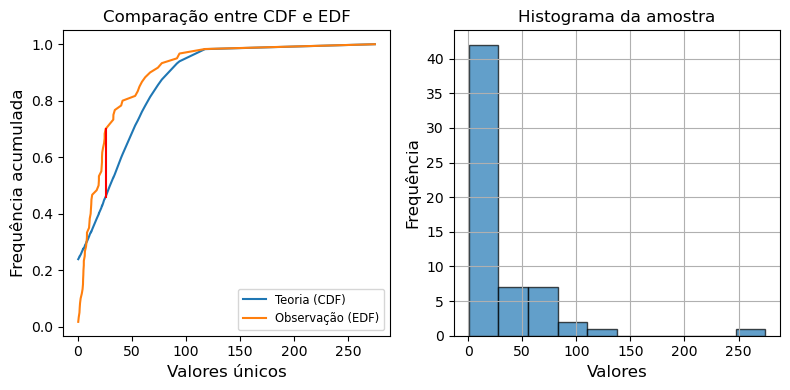

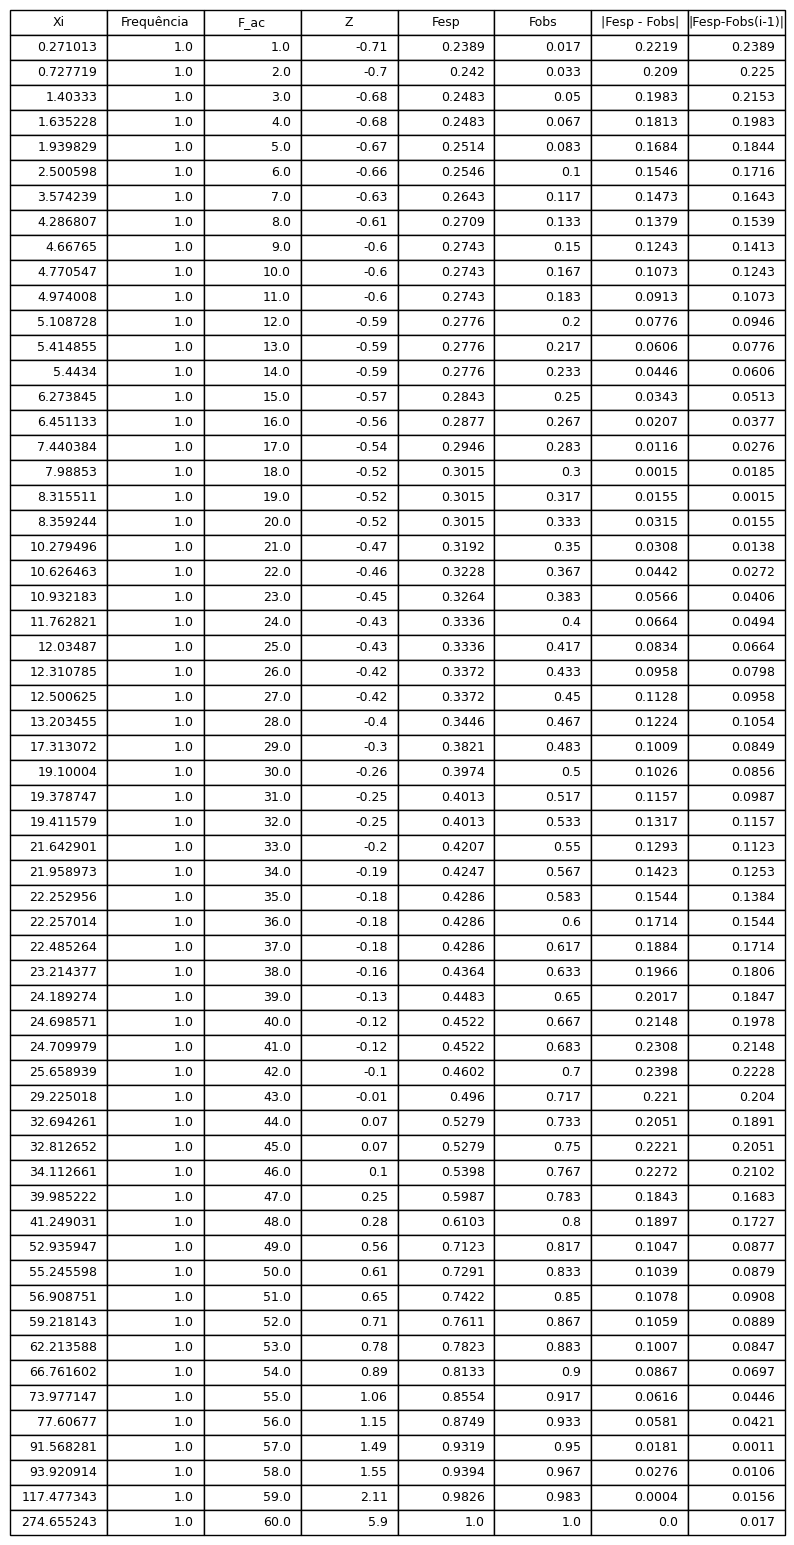

In [28]:
dados = np.random.exponential(30, 60)
resultados.append(kolmogorov_smirnov_test(dados))


Média (μ): 9.151712
Desvio padrão (σ): 9.188447
-------------------------------------------------------------------------------------
Há evidências de que os dados observados não seguem uma distribuição normal.
-------------------------------------------------------------------------------------
Estatística D: 0.2505
Valor crítico: 0.1723
p-value: 0.001073444309392598
-------------------------------------------------------------------------------------


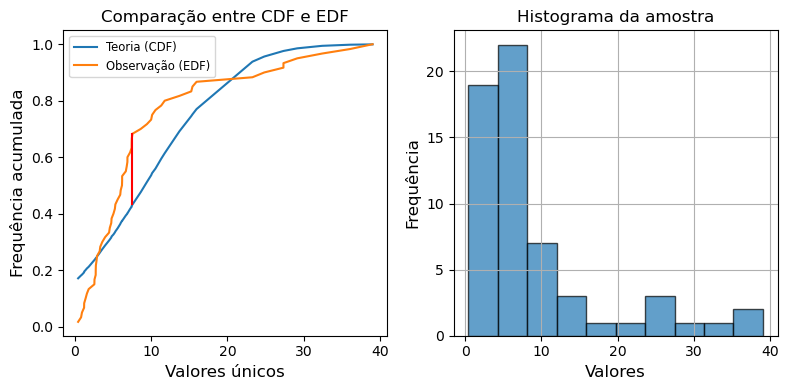

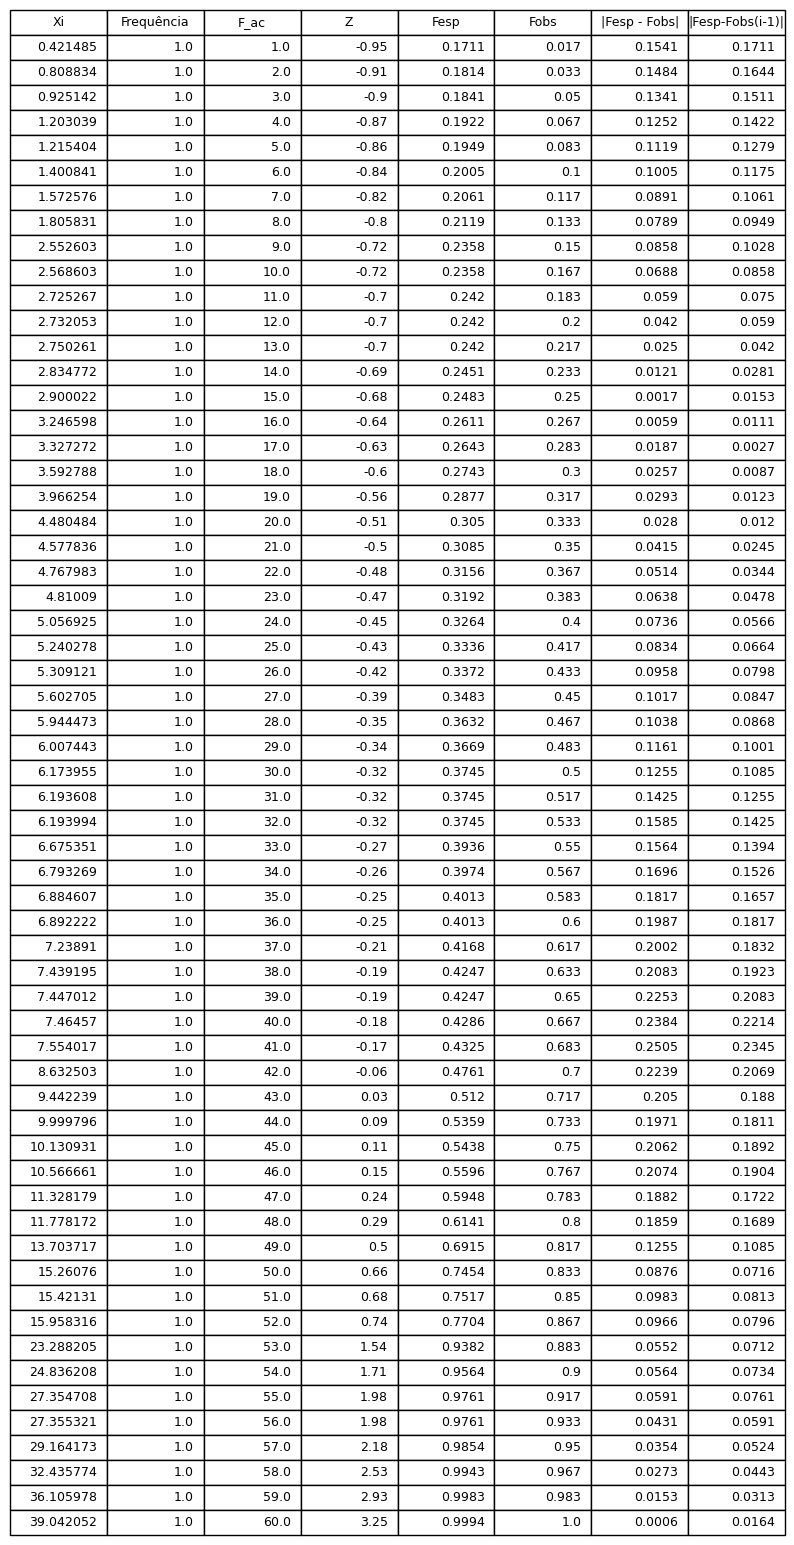

In [31]:
dados = np.random.exponential(10,60)
resultados.append(kolmogorov_smirnov_test(dados))


## RELATÓRIO

Utilizamos um total de 50 amostras, todas com tamanho variando entre 30 e 100.

Após realizar o teste de Kolmogorov-Smirnov em todas as amostras, obtivemos os seguintes resultados:

- 27 amostras foram classificadas como normais.
- 23 amostras foram classificadas como não normais.


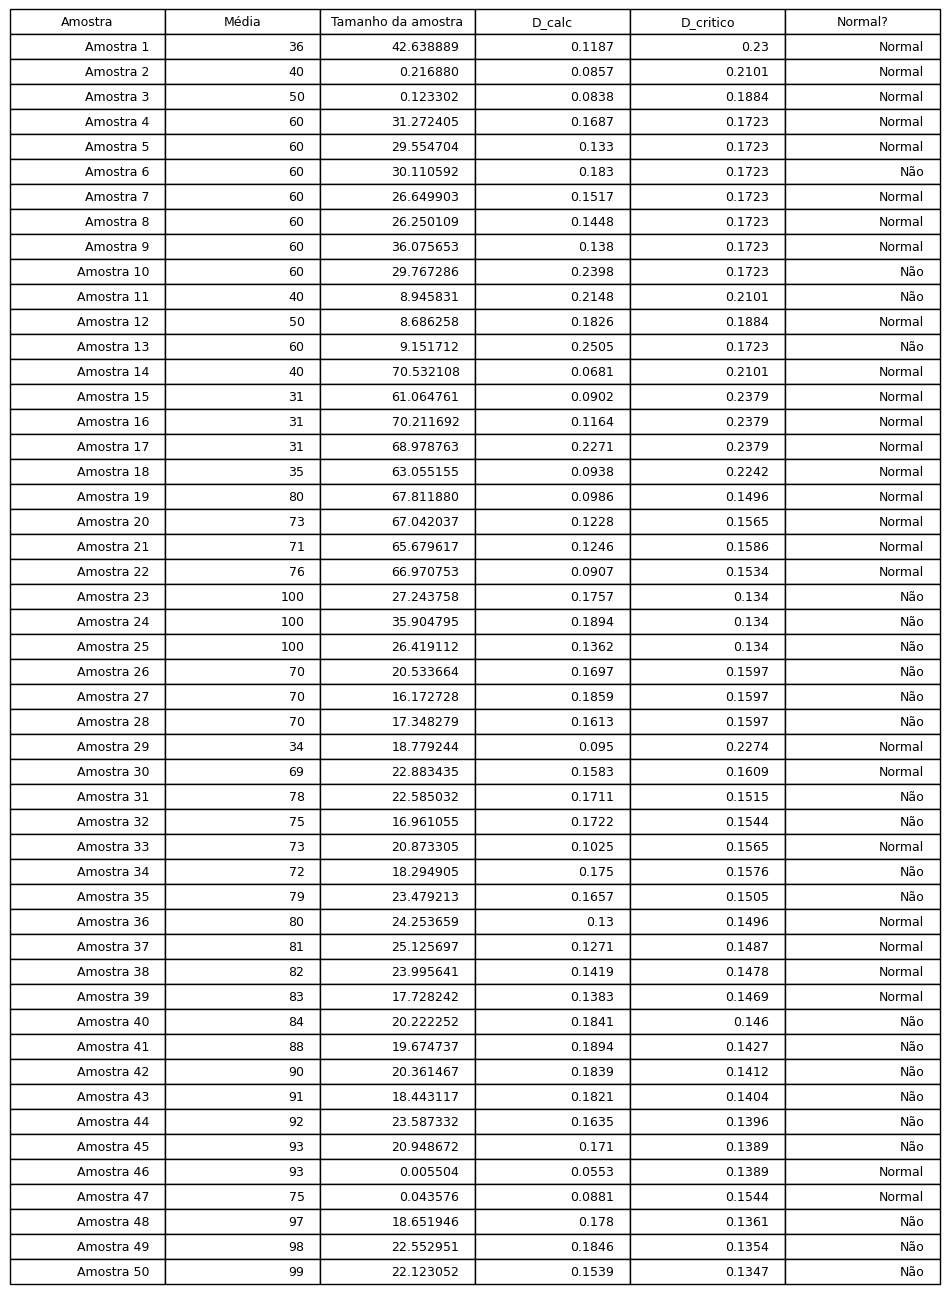

Amostras Normais: 27
Amostras Não Normais: 23


In [94]:
col_labels = ['Amostra','Média', 'Tamanho da amostra',  'D_calc', 'D_critico', 'Normal?']
table_data = [['Amostra {}'.format(i+1)] +[resultados[i]['Tamanho da amostra']] + ['{:.6f}'.format(resultados[i]['Média'])] + [resultados[i][key] for key in ['D_calc', 'D_critico', 'Normal?']] for i in range(len(resultados))]

fig, ax = plt.subplots(figsize=(12, 4))
table = ax.table(cellText=table_data, colLabels=col_labels, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)
ax.axis('off')
plt.show()

contagem_normal = sum(1 for resultado in resultados if resultado['Normal?'] == 'Normal')
contagem_nao_normal = sum(1 for resultado in resultados if resultado['Normal?'] == 'Não')

print("Amostras Normais:", contagem_normal)
print("Amostras Não Normais:", contagem_nao_normal)